**UEM SEMESTER PROJECT 5TH SEMESTER : BREAST CANCER CLASSIFICATION**

Author Name : Rajarshi Banerjee

Class and Section : 3 D

Year: 3 RD Year

Organisation : University of Engineering and Management, Kolkata

Group ID : 113

Enrollment Number : 12019009022068

**BREAST CANCER CLASSIFICATION USING RBF AND A COMPARITIVE STUDY BETWEEN MODELS**

**SUB PROJECT : CUSTOM CONVOLUTIONAL NEURAL NETWORK**

In this project we have classified Breast Cancer cells using rbf and we aim to implement different models and compare the accuracy on the data for the different models.

The models implemented in this project are :

- Custom Convolutional Neural Network
- VGG 16
- VGG 19
- SVC with RBF
- EfficientNETB0
- EfficientNETB1
- EfficientNETB2
- EfficientNETB3
- EfficientNETB4
- EfficientNETB5
- EfficientNETB6
- EfficientNETB7
- EfficientNETB8
- EfficientNETB9

**SYSTEM SPECIFICATIONS AND REQUIREMENTS FOR THIS PROJECT**

We have used Anaconda to create a separate environment for this project with the following installed:

- Tensorflow 2.8.0
- Python 3.9
- Numpy
- OpenCV
- CudaToolkit 11.3
- cuDNN Libaries for CudaToolkit 11.3
- Pytorch
- Matplotlib

The system that this project was run on and the models were trained had the following specifications:

- CPU : AMD RYZEN 5 5600X
- GPU : NVIDIA GEFORCE RTX 3060TI
- RAM : 16 GB DDR4 3600 MHZ
- STORAGE : 1TB KINGSTON NVME M.2 SSD
- PSU : 750 GIGABYTE POWERSUPPLY

We start by importing the necessary libaries.

- We start by importing ImageDataGenerator which generates multiple versions of the image by shrinking it, zooming and flipping it horizontally or vertically.
- We then import Sequential to enable stacking of neurons.
- We then import the Convolutional and Maxpooling layers, maxpooling reduces the size of the images.
- We need to have Activation functions to tell the neural network when to activate and if it is either 0 or 1.
- We need to have Dropout as it drops out some of the neurons while training to prevent overfitting, if kept at 0.5 then at one particular time half of the neurons will be switched off and wont learn. 
- Flatten converts 2D image to 1D image. 
- Dense helps in create layers.
- Backend tells us which channel is coming first.
- Numpy is used to convert lists into arrays.
- Image processes the data.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import models,layers
import os
import glob
import cv2
from keras import backend as K

We then specify the dimensions of the images and initialising the directory of the stored images. 

Number of training and validation samples used are 8000 and 1000 respectively.

Epochs are set to 100, the images are passed 100 times before the neural network learns the images.
batch_size = Every 20 batches of images will be going in the neural network, each batch will be given 100 times.

In [20]:
img_width, img_height = 150, 150

train_data_dir = 'Dataset1/train'
validation_data_dir = 'Dataset1/valid'
nb_train_samples = 8000
nb_validation_samples = 1000
epochs = 50
batch_size = 20

Now we check if the image is in the right format or not, which should be IMG_WIDTH, IMG_HEIGHT, CHANNELS

In [21]:
if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height,3)

Now we generate the training data. We have rescaled it, sheared it, zoomed it and horizontally flipped it. So out of one image we have generated 4 images for the training data. 

For the validation data, we have only rescaled it.

In [22]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

Now we get the images from the respective directories

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary')

val_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


**CUSTOM CONVOLUTIONAL NEURAL NETWORK**

In the neural network the convolutional and maxpooling layers work as follows : 

- Convolutional layer: you super-impose the convolutional kernel on the input pixel and then perform the element wise multiplication.

- Max Pooling : you super-impose the pooling kernel on the input pixel and take the maximum.

Max_pooling reduces the size of the input, and performs kind of summarization of the data, and at the same time provides some invariance to translational transformations. Convolution, depending on the conditions on the filter coefficients can be regarded as filters allowing to extract some patterns

The neural network structure is as follows : 

*Feature Extraction* - 

- Model which becomes an object of Sequential
- Convolutional Layer with a 3x3 filter and specified input shape (Searches for 32 features using a matrix of size 3x3)
- Activation function relu
- MaxPooling Layer with a 2x2 filter, it reduces the size to half while maintaining the same size that we had.

- Model which becomes an object of Sequential
- Convolutional Layer with a 3x3 filter and specified input shape (Searches for 32 features using a matrix of size 3x3)
- Activation function relu
- MaxPooling Layer with a 2x2 filter, it reduces the size to half while maintaining the same size that we had.

- Model which becomes an object of Sequential
- Convolutional Layer with a 3x3 filter and specified input shape (Searches for 64 features using a matrix of size 3x3)
- Activation function relu
- MaxPooling Layer with a 2x2 filter, it reduces the size to half while maintaining the same size that we had.

- Model which becomes an object of Sequential
- Convolutional Layer with a 3x3 filter and specified input shape (Searches for 128 features using a matrix of size 3x3)
- Activation function relu
- MaxPooling Layer with a 2x2 filter, it reduces the size to half while maintaining the same size that we had.

*After the features have been extracted and the size has been reduced* - 

- Flatten reduces the image from 2D to 1D
- Dense Layer with 64 neurons
- Activation function relu
- Dropout so that it does not overfit
- Dense layer with 1 output neuron where all the 64 neurons in the previous hidden layer connect to
- Activation function sigmoid so the value ranges between 0 and 1

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

The Model is then compiled with :

- loss = binary_crossentropy
- optimizer = adam
- metrics = accuracy

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model is then trained on the training data and the accuracy is measured on both the training and the validation dataset.
The steps_per_epoch is the batch_size and the epochs is 100 as specified at the very start.

In [8]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    shuffle = True)

Epoch 1/50


C:\Users\rajar\AppData\Local\Temp\ipykernel_3496\2077240848.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


400/400 [==============================] - 26s 60ms/step - loss: 0.5446 - accuracy: 0.7178 - val_loss: 0.3948 - val_accuracy: 0.8340
Epoch 2/50
400/400 [==============================] - 24s 59ms/step - loss: 0.4482 - accuracy: 0.8019 - val_loss: 0.3526 - val_accuracy: 0.8530
Epoch 3/50
400/400 [==============================] - 24s 60ms/step - loss: 0.4265 - accuracy: 0.8186 - val_loss: 0.3361 - val_accuracy: 0.8510
Epoch 4/50
400/400 [==============================] - 24s 59ms/step - loss: 0.4028 - accuracy: 0.8279 - val_loss: 0.3197 - val_accuracy: 0.8650
Epoch 5/50
400/400 [==============================] - 23s 59ms/step - loss: 0.3952 - accuracy: 0.8339 - val_loss: 0.3960 - val_accuracy: 0.8330
Epoch 6/50
400/400 [==============================] - 24s 59ms/step - loss: 0.3924 - accuracy: 0.8356 - val_loss: 0.3294 - val_accuracy: 0.8630
Epoch 7/50
400/400 [==============================] - 24s 59ms/step - loss: 0.3843 - accuracy: 0.8394 - val_loss: 0.3377 - val_accuracy: 0.8670
Epo

Model is then evaluated on the training and validation dataset and the respective accuracy is displayed 

In [9]:
model.evaluate(train_generator)
model.evaluate(val_generator)

100/100 [==============================] - 1s 10ms/step - loss: 0.3436 - accuracy: 0.8720


[0.3436296284198761, 0.871999979019165]

Now for image prediction, we import the image from the respective directory and specify a target size, the image is then converted into a numpy array which is then given to the prediction model.

In [10]:
img_pred = image.load_img('Dataset1/test/1_Cancer/10253_idx5_x801_y651_class1.png', target_size = (150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
img_pred.shape

(1, 150, 150, 3)

If the prediction is 1 then it is a Cancer image, if the prediction is 0 then it is a Non Cancer image.

In [11]:
pred = model.predict(img_pred)
if pred[0][0] == 1:
    prediction = "Cancer"
else:
    prediction = "No Cancer"

print (prediction)

Cancer


The prediction given by this model is correct, we will now be saving the model weights for future purposes so that we do not have to retrain it.

In [12]:
model.save_weights('cnn.h5')

Now we plot the Validation and Training loss and Validation and Training Accuracy

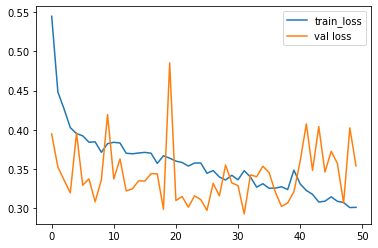

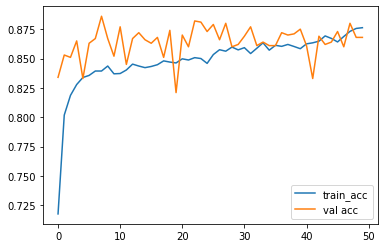

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(hist.history['accuracy'],label='train_acc')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

**VGG-16 IMPLEMENTATION**